In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import sklearn
from sklearn.metrics import confusion_matrix
%matplotlib inline  
from os.path import exists, join
import h5py
import random as rn
import os
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
random_state = np.random.RandomState(0)
from sklearn.metrics import roc_curve, auc

Loading Iris dataset for classification

In [83]:
iris = datasets.load_iris()
# Take the first two features
X = iris.data[:, :2]
Y = iris.target

Since Iris dataset is a multivariate, 3 class data, and we want to perform binary classification on this data thus we need to convert the inputs to binary form of dataset, hence for this i am using logical OR operation and converting the data to binary format as shown below

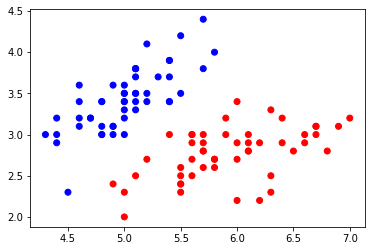

In [84]:
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]
#Plot the binary iris data
cols = ['b', 'r', 'g', 'm', 'c']
col = [cols[int(i)] for i in Y]
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

Secondly as the question suggested for data overlapping across the classes to achieve this we include noise to the binary tranformed dataset

In [85]:
import numpy as np 
mu, sigma = 0, 0.5 
target_dims = Y.shape
# creating a noise with the same dimension as the dataset (100,2) 
noise1 = np.random.normal(mu, sigma, [100,2]) 
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]+noise1
Y = Y[np.logical_or(Y==0,Y==1)]

In [86]:
Y.shape

(100,)

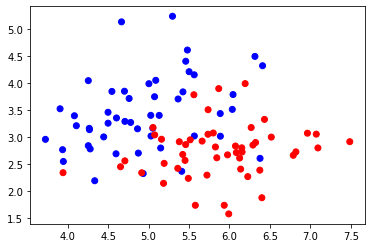

In [87]:
#Plot the binary iris data
cols = ['b', 'r', 'g', 'm', 'c']
col = [cols[int(i)] for i in Y]
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

In [88]:
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3,random_state=0)

In [89]:
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)

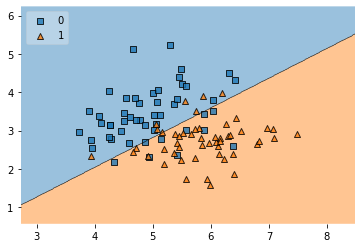

In [90]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, classifier, legend=2)
plt.show()

In [91]:
classifier1 = svm.SVC(kernel='poly', probability=True)
probas1_ = classifier1.fit(x_train, y_train).predict_proba(x_test)

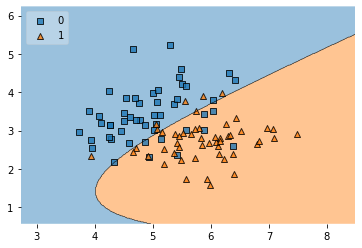

In [92]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, classifier1, legend=2)
plt.show()

In [93]:
classifier2 = svm.SVC(kernel='rbf', probability=True)
probas2_ = classifier2.fit(x_train, y_train).predict_proba(x_test)

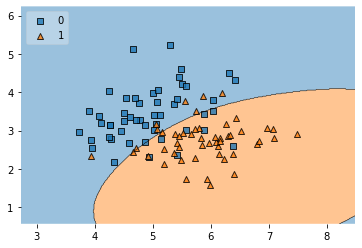

In [94]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, classifier2, legend=2)
plt.show()

In [95]:
classifier3 = svm.SVC(kernel='sigmoid', probability=True)
probas3_ = classifier3.fit(x_train, y_train).predict_proba(x_test)

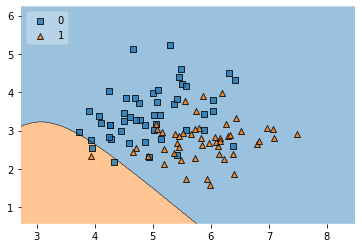

In [97]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, classifier3, legend=2)
plt.show()

In [98]:
y_predict = classifier.predict(x_test)
y_predict1 = classifier1.predict(x_test)
y_predict2 = classifier2.predict(x_test)
y_predict3 = classifier3.predict(x_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict))
confusion = pd.DataFrame(cm)
confusion

,0,1
0,13,2
1,2,13


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = np.array(confusion_matrix(y_test, y_predict1))
confusion = pd.DataFrame(cm1)
confusion

,0,1
0,13,2
1,2,13


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
cm2 = np.array(confusion_matrix(y_test, y_predict2))
confusion = pd.DataFrame(cm2)
confusion

,0,1
0,14,1
1,2,13


In [102]:
from sklearn.metrics import classification_report, confusion_matrix
cm3 = np.array(confusion_matrix(y_test, y_predict3))
confusion = pd.DataFrame(cm3)
confusion

,0,1
0,15,0
1,15,0


In [103]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [104]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [105]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [106]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
total=sum(sum(cm))
total1=sum(sum(cm1))
total2=sum(sum(cm2))
total3=sum(sum(cm3))

In [108]:
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.8666666666666667
Sensitivity :  0.8666666666666667
Specificity :  0.8666666666666667


In [109]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Accuracy :  0.8666666666666667
Sensitivity :  0.8666666666666667
Specificity :  0.8666666666666667


In [110]:
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

Accuracy :  0.9
Sensitivity :  0.8666666666666667
Specificity :  0.9333333333333333


In [111]:
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Sensitivity : ', sensitivity3)

specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Specificity : ', specificity3)

Accuracy :  0.5
Sensitivity :  0.0
Specificity :  1.0


In [112]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9777777777777779


In [113]:
fpr1, tpr1, thresholds = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

0.9733333333333334


In [114]:
fpr2, tpr2, thresholds = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

0.9777777777777779


In [115]:
fpr3, tpr3, thresholds = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)

0.5


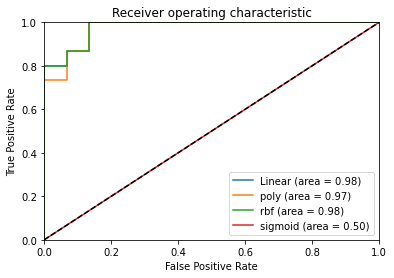

In [116]:
pl.clf()
pl.plot(fpr, tpr, label='Linear (area = %0.2f)' % roc_auc)
pl.plot(fpr1, tpr1, label='poly (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='rbf (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='sigmoid (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()